## (DEMO) Deep Neural Network Tutorial

신경망 맛보기 튜토리얼입니다. 

github 에 자신의 결과물을 올리고 공유해주세요

모든 유튜브 비디오의 Reference

* PyTorch Zero To All Lecture by Sung Kim hunkim+ml@gmail.com at HKUST
* Code: https://github.com/hunkim/PyTorchZeroToAll 
* Slides: http://bit.ly/PyTorchZeroAll

### 데이터 살펴보기

In [1]:
from IPython.display import YouTubeVideo
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt

In [2]:
np.random.seed(777)  # 동일한 숫자가 나오게 시드를 고정 시켜야합니다.
x1 = np.random.normal(loc=-2, scale=1, size=(50, 2))
##x2 = np.random.normal(loc=1, scale=1.5, size=(50, 2))
##Y define ??

y1 = np.random.normal(loc=1, scale=1.5, size=(50, 2))
classes = np.repeat([0, 1], 50)


def plot(x, y, tag, ax):
    """
    x: 데이터의 x 좌표
    y: 데이터의 y 좌표
    tag: class 의 이름입니다. 0번일 경우 빨강, 1번일 경우 파랑색, 기타의 경우 노란색으로 표시됩니다.
    ax: matplotlib axes 객체입니다. 아래 실습의 경우 "ax" 를 넣으면 됩니다.
    """
    color = 'red' if tag == 0 else 'blue' if tag==1 else 'yellow' 
    ax.scatter(x, y, c=color)

위에서 우리는 랜덤 데이터를 생성했습니다. $x_1$, $x_2$ 각 50개의 2차원 데이터가 있고, $x_1$ 의 클래스는 0(빨강색), $x_2$ 의 클래스는 1(파랑색)로 가정합니다. 이제 데이터가 2차원 평면에 어떻게 펼쳐져 있는지 알아봅니다.

### [실습] 그려보기

데이터가 2차원에서 어떻게 펼쳐져 있는지 확인해봅니다. 위에서 제시한 `plot` 함수를 사용해서 2차원에 그려보세요!

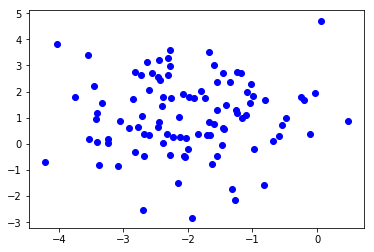

In [3]:
fig, ax = plt.subplots()
# 위에 코드를 건드리지 마세요
# TODO: 데이터를 2차원 평면에 그려보세요. 

plot(x1,y1,1,ax)
# 힌트: 위에서 제시한 plot 함수를 사용해보세요. 추가로, ax 인자에는 ax 변수를 넣으면 됩니다.

plt.show(block=False)

### 선형모델로 데이터 분류하기

(선형모델의 개념설명)

우리에게는 2차원의 데이터 $x$ 가 있고, $x$ 를 통해서 결과값인 $y$ 빨강점과 파랑점을 잘 구별하고 싶다. 고등학교 수학때 배운 함수를 생각해보자.

$$y = f(x)$$

위에 표시된 함수는 우리가 원하는 결과물인것 같다. $x$를 넣으면 $y$ 라는 값이 나오는 함수. 그렇다면 이 $f$ 라는 함수를 어떻게 설계를 해야할까? 아래 영상을 통해 1차원 데이터의 모델설계부터 모델훈련까지 공부해봅니다.

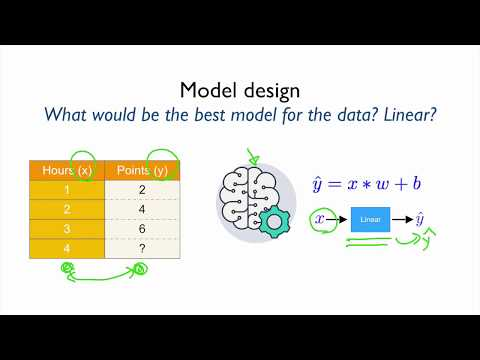

In [4]:
# 해당 코드를 실행하면 영상이 나옵니다.
YouTubeVideo("l-Fe9Ekxxj4", width=600, height=400)

**핵심개념**

* Linear regression
* Training Loss:

이제 아래와 같은 가설을 세워보겠습니다. $x_1$ 과 $x_2$ 의 선형결합으로 점들을 구별하는 모델이 우리의 함수 $f$ 라고 가설을 세울수 있습니다.

$\hat{y} = w_1x_1 + w_2x_2 + b$

손실값은 어떻게 정의할까요? 우리의 결과 $y$ 값은 0(빨강색) 아니면 1(파랑색) 로 정의 됩니다.

$L = \displaystyle\sum_{i=1}^{N}(\hat{y}-y)^2$

따라서 $L$ 값이 커질수록 오차가 커져서 우리가 세운 가설이 데이터를 예측하는데 도움이 안된다는 것을 알려줍니다.

### [실습] 가설구현

2차원 데이터 하나 $x$의 예측값을 구하는 함수 `forward` 와 해당 예측값과 실제 값의 차이인 `loss` 함수를 작성해봅니다.

In [4]:
x2 = np.random.normal(loc=1, scale=1.5, size=(50, 2))

In [5]:
x_data = np.concatenate((x1, x2))
y_data = classes
w = np.random.randn(2)  # (w1, w2) 가중치 랜덤한 초기값 설정
b = np.random.randn(1)  # (b) bias 값 설정

print("초기 w 값은", f"{w.round(3)}", "b 값은", f"{b.round(3)}", "이다.")
# 위에 코드를 건드리지 마세요

def forward(x, w, b):
    """
    가설: y = w1*x1 + w2*x2 + b
    x: 2차원 np.array 객체
    w: 2차원 np.array 객체
    """ 
    # TODO: 2차원 데이터 1 개의 예측값을 구해보자
    # 아래 식과 같은 결과를 나타내야 합니다. 힌트: np.dot 을 활용해보세요
    # x[0] * w[0] + x[1] * w[1] + b 
    # 정답
    return np.dot(x,w) + b 

def loss_function(y_hat, y):
    """
    손실함수: (y_hat - y) 의 제곱
    """
    # TODO: 예측값 1개에 대해서 손실값을 구해보자
    # 정답
    return np.square(y_hat-y)

##square 함수 알려주어야 하지 않나요 ??


초기 w 값은 [ 1.422 -1.91 ] b 값은 [0.318] 이다.


아래 코드를 실행시켜 모든 데이터들에 대해서 손실함수의 평균을 구해봅니다.

In [6]:
losses = []
for x, y in zip(x_data, y_data):
    y_hat = forward(x, w, b)
    loss = loss_function(y_hat, y)
    losses.append(loss)

print("loss 평균은", f"{np.mean(losses):.4f}", "이다.")

loss 평균은 8.6196 이다.


**[질문]** 손실값이 큰편인가요? 손실값이 어느정도 되야 가설로 세운 모델이 점들을 판별할수 있을까요?

(답변을 해당칸에 작성하세요) 0에 가까울수록 좋을것같아요

### 학습의 진행: Gradient Descent

In [ ]:
# 해당 코드를 실행하면 영상이 나옵니다.
YouTubeVideo("b4Vyma9wPHo", width=600, height=400)

미분 

$\begin{aligned} 
\dfrac{\partial loss}{\partial w_1} &= 2 (\hat{y}-y)(x_1) \\
\dfrac{\partial loss}{\partial w_2} &= 2 (\hat{y}-y)(x_2) \\
\dfrac{\partial loss}{\partial b} &= 2 (\hat{y}-y)\times 1
\end{aligned}$

In [7]:
def gradient(x, y, w, b):
    """
    w 와 d 에대한 미분을 구하는 함수입니다.
    """
    dw = 2 * (forward(x, w, b) - y) * x
    db = 2 * (forward(x, w, b) - y)
    return dw, db

In [8]:
def backward(x, y, w, b, lr=0.1):
    """
    경사하강법으로 업데이트 합니다.
    """
    dw, db = gradient(x, y, w, b)
    w -= lr * dw
    b -= lr * db
    return w, b

In [9]:
def train(x, y, w, b, lr=0.01):
    """
    가중치를 훈련 시키는 함수입니다.
    """
    y_hat = forward(x, w, b)
    loss = loss_function(y_hat, y)
    w, b = backward(x, y, w, b, lr=lr)
    return loss, w, b

에폭(epoch)이란 학습용 데이터를 한번 순환했을 때를 말합니다. Step 이라고도 합니다.

In [10]:
for epoch in range(5):
    losses = []
    for x, y in zip(x_data, y_data):
        loss, w, b = train(x, y, w, b, lr=0.01)
        losses.append(loss)
    print("(Epoch {}) Loss: {:.4f} | W: {} | b: {}".format(epoch, np.mean(losses), w.round(3), b.round(3)))

(Epoch 0) Loss: 1.7408 | W: [ 0.216 -0.003] | b: [0.479]
(Epoch 1) Loss: 0.0761 | W: [0.094 0.063] | b: [0.67]
(Epoch 2) Loss: 0.0584 | W: [0.07  0.055] | b: [0.743]
(Epoch 3) Loss: 0.0593 | W: [0.062 0.05 ] | b: [0.769]
(Epoch 4) Loss: 0.0604 | W: [0.06  0.048] | b: [0.778]


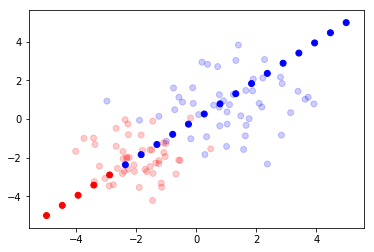

In [11]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'blue']
fig, ax = plt.subplots()
ax.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.2)
xs = np.linspace(-5, 5, num=20).reshape(20, 1).repeat(2, axis=1)
predicts = forward(xs, w, b)
predicts = (predicts >= 0.5).astype(np.int)
ax.scatter(xs[:, 0], xs[:, 1], c=predicts, cmap=matplotlib.colors.ListedColormap(colors))
plt.show(block=False)

**[질문]** 예측 결과가 생각만큼 나왔나요? 어느정도의 오차가 있는것 같나요?

(답변을 해당칸에 작성하세요) loss 0.06이면 괜찮다고 생각

### 나의 첫 신경망 만들기: Logistic Regression

* 목적: 두 클래스를 분류하는 Neural Network 만들기

아래 동영상을 시청하고 두 개의 클래스를 구분하는 신경망을 만들어 보아요!

In [ ]:
# 해당 코드를 실행하면 영상이 나옵니다.
YouTubeVideo("GAKTBQn7yKo", width=600, height=400)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

In [13]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size)
        self.activation_1 = nn.Sigmoid()
        self.linear_2 = nn.Linear(hidden_size, output_size)
        self.prob = nn.Sigmoid()
    
    def forward(self, inputs):
        outputs = self.linear_1(inputs)
        outputs = self.activation_1(outputs)
        outputs = self.linear_2(outputs)
        outputs = self.prob(outputs)
        return outputs
    
    
## 무슨 네트워크인지 설명추가하면 좋을것 같아요

In [14]:
model = Net(input_size=2, hidden_size=10, output_size=1)

In [15]:
inputs = x_data[0]
model(inputs)

tensor([0.5230], grad_fn=<SigmoidBackward>)

최종 모델의 출력 결과가 0.5 보다 크면 0 클래스로 분류 아니면 1 클래스로 분류하게 됩니다.

In [16]:
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for step in range(10):
    losses = []
    for x, y in zip(x_data, y_data):
        model.zero_grad()
        # forward
        prob = model(x)
        # loss
        loss = loss_function(prob, y.view(-1))
        # backward
        loss.backward()
        optimizer.step()
        # save loss
        losses.append(loss.item())
    print("Training Loss: {}".format(np.mean(losses)))

Training Loss: 0.2783556216210127
Training Loss: 0.23498018109239638
Training Loss: 0.17498268496943636
Training Loss: 0.15564191767713054
Training Loss: 0.1475540573359467
Training Loss: 0.14327357775124255
Training Loss: 0.14062425811309368
Training Loss: 0.1388202197337523
Training Loss: 0.13752007806615438
Training Loss: 0.1365482272283407


### 테스트 해보기

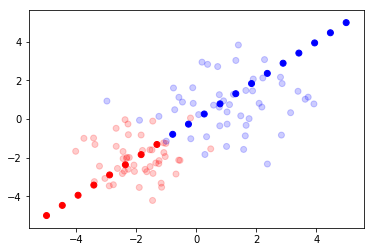

In [17]:
fig, ax = plt.subplots()
ax.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.2)
xs = np.linspace(-5, 5, num=20).reshape(20, 1).repeat(2, axis=1)
predicts = model(torch.FloatTensor(xs))
predicts = predicts.ge(0.5).numpy()
ax.scatter(xs[:, 0], xs[:, 1], c=predicts.reshape(-1), cmap=matplotlib.colors.ListedColormap(colors))
plt.show(block=False)

**[질문]** 위의 선형 모델과 비교했을때, 예측 결과가 생각만큼 나왔나요? 어느정도의 오차가 있는것 같나요?

(답변을 해당칸에 작성하세요) 요게 어렵네요 근데 loss는 비슷하네요 

### [실습] 3개의 클래스를 판별하는 네트워크 만들기

이전 과는 다르게 손실함수를 다른 것을 써야한다는 점을 유의하자. (Cross Entorpy, Softmax 설명 필요)

In [18]:
np.random.seed(777)  # 동일한 숫자가 나오게 시드를 고정 시켜야합니다.
x1 = np.random.normal(loc=-2, scale=1, size=(100, 2))
x2 = np.random.normal(loc=(-2, 6), scale=1.5, size=(100, 2))
x3 = np.random.normal(loc=(4, 2), scale=1.5, size=(100, 2))
classes = np.repeat([0, 1, 2], 100)
x_data = torch.FloatTensor(np.concatenate((x1, x2, x3)))
y_data = torch.LongTensor(classes)

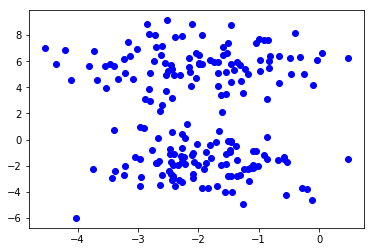

In [19]:
fig, ax = plt.subplots()
# TODO: 데이터를 2차원 평면에 그려보세요
# 정답
plot(x1,x2,1,ax)
plt.show(block=False)
##????

In [20]:
import torch.nn.functional as F

In [21]:
# TODO: 3개의 클래스를 판별하는 네트워크를 만들어 보세요.
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size)
        self.activation_1 = nn.ReLU()
        self.linear_2 = nn.Linear(hidden_size, output_size)
        self.prob = nn.Softmax()
        
    def forward(self, inputs):
        outputs = self.linear_1(inputs)
        outputs = self.activation_1(outputs)
        outputs = self.linear_2(outputs)
        outputs = self.prob(outputs)
        return outputs

In [22]:
model = Net(input_size=2, hidden_size=10, output_size=3)

In [23]:
inputs = x_data[0]
model(inputs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([0.2127, 0.6121, 0.1753], grad_fn=<SoftmaxBackward>)

손실함수는 어떻게 정의해야할까요? 아래 손실함수 중에 제일 적합한 것을 골라서 적용해보세요

* nn.NLLLoss() : Negative Log Likelihood Loss
* nn.MSELoss() : Mean Square Error Loss
* nn.BCELoss() : Binary Cross Entropy Loss
* nn.CrossEntropyLoss() : Cross Entropy Loss

In [24]:
# TODO: 손실함수 적용
##좋은 문제 !!
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(10):
    losses = []
    for x, y in zip(x_data, y_data):
        model.zero_grad()
        # forward
        prob = model(x)
        # loss
        loss = loss_function(prob.view(1, -1), y.view(-1))
        # backward
        loss.backward()
        optimizer.step()
        # save loss
        losses.append(loss.item())
    print("Training Loss: {}".format(np.mean(losses)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Training Loss: 0.599097061753273
Training Loss: 0.5644811189174652
Training Loss: 0.5596203903357188
Training Loss: 0.5584486587842306
Training Loss: 0.5581183473269145
Training Loss: 0.5580817266305288
Training Loss: 0.5580352725585301
Training Loss: 0.5580770178635915
Training Loss: 0.5584155384699504
Training Loss: 0.5591922811667125


In [25]:
# Todo3: 아래 데이터를 넣고 판별하시고 자신이 생각하는 것과 일치하는 지 보세요
x_test = torch.FloatTensor([3, 2])
predicted_class = model(x_test).max(-1)[1].item()
print("예측한 class: {}".format(predicted_class))

예측한 class: 2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


**[질문]** 자신이 생각한 클래스와 일치한가요? 손실함수는 무엇을 쓰셨나요? 왜 해당 손실함수를 사용하셨나요?

(답변을 해당칸에 작성하세요) 진리의 cross entropy. 다분류는 크로스 엔트로피가 짱 

## 제출 준비

`File > Save and Checkpoint` 를 눌러서 저장하시고 아래 코드를 실행시켜서 제출을 준비하세요! 자신의 노트북 파일을 한번 실행 시켜서 Github 에 업로드하시고, 하단의 코드창 `github_link` 변수에 string type 으로 링크를 적어주세요. 

Github 업로드 후, 링크를 적고나면 맨 아래의 제출 코드들을 실행합니다. (이전 코드는 다시 실행할 필요가 없습니다.)

In [ ]:
# 하단에 github 링크입력 후 실행 (github 링크를 넣지 않으면 파일 제출 자체가 불가능합니다.)
# github_link : master branch 에 있는 링크를 주세요!
# 예시: 
# github_link = 'https://github.com/simonjisu/review_demo/blob/master/notebooks/DemoAnswer.ipynb'
github_link = 

---

## 제출

(위의 경계선 이하의 행들은 py 파일로 전환되지 않습니다.)

github 업로드 방법은 아래와 같습니다.

```
$ git add [업로드 하려고 하는 jupyter notebook]
$ git commit -m '[쓰고자하는 메세지]'
$ git push
```

깃허브에 자신의 노트북을 업로드 완료후, 아래에 링크를 다시한번 입력하시고 실행하여 제출을 준비하세요! 결과물은 outputs 라는 파일안에 있습니다.

In [ ]:
github_link = 
### 아래 코드를 수정하지마세요
import os
import sys
sys.path.insert(0, os.path.split(os.getcwd())[0])
from review_system.run_submit import submit
submit(github_link)

**"파일 제출 준비 완료!"** 라는 메세지가 뜨면, "outputs" 라는 폴더를 zip 파일로 압축 시키고 edwith 에 제출하세요!